In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import string 
from wordcloud import WordCloud
import spacy
import texthero as hero


import nltk


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vanshika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vanshika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from spacy.cli import download

download("en_core_web_sm")

spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [4]:
filename="Product_details.csv"
df = pd.read_csv(filename)

In [5]:
df

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...,...
6359,2945,Thanks @mention for hosting this event #sxsw #...,9,2
6360,4528,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,6526,RT @mention RT @mention Download 20+ free trac...,9,2
6362,2110,OH at Texas Social Media Awards: 'You don't ne...,9,2


In [7]:
df.shape

(6364, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [9]:
#checking null values if present

df.isnull().sum()

Text_ID                0
Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

In [10]:
#checking unique values 

df["Sentiment"].unique()

array([2, 1, 3, 0], dtype=int64)

In [11]:
df['Product_Type'].unique()

array([9, 6, 7, 2, 8, 3, 0, 5, 1, 4], dtype=int64)

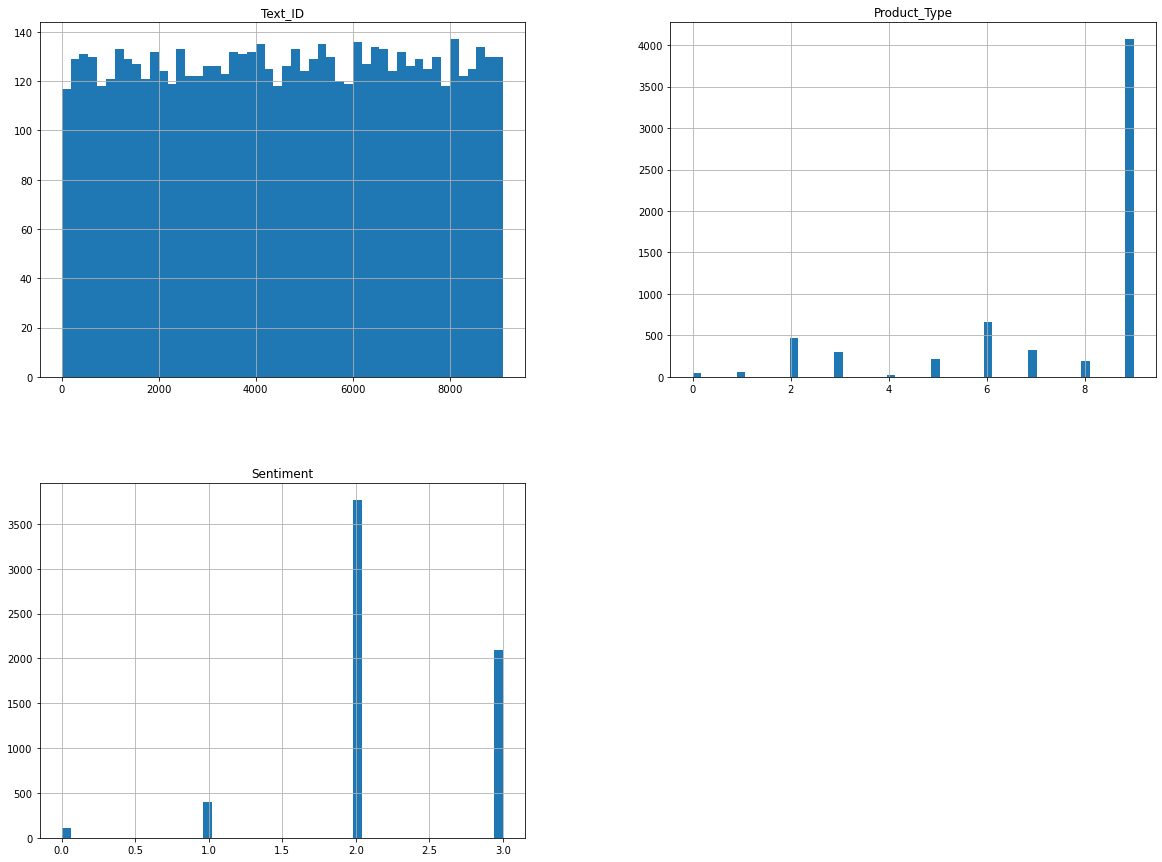

In [12]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
###  From here we can see that there are more than 3500 ratings of 2.0 which is the highest  
### there are approx 2000 ratings of 3.0
### 0 is the lowest rating , 
### there are around 400 ratings of 1.0


### PRODUCT 9 HAS GOT THE HIHEST REVIEWS,THEN PRODUCT 6 , THEN PRODUCT 2

In [16]:
df.describe()

,Text_ID,Product_Type,Sentiment
count,6364.000000,6364.000000,6364.000000
mean,4568.862822,7.462445,2.230673
std,2621.198346,2.440492,0.638413
min,1.000000,0.000000,0.000000
25%,2297.750000,6.000000,2.000000
50%,4587.500000,9.000000,2.000000
75%,6827.500000,9.000000,3.000000
max,9092.000000,9.000000,3.000000


In [17]:
#classifying ratings

sen_3 = len(df[df['Sentiment']==3])
sen_2=len(df[df['Sentiment']==2])
sen_1=len(df[df['Sentiment']==1])
sen_0=len(df[df['Sentiment']==0])


#######################################################

print("sen_3 = ",sen_3)
print("sen_2 = ",sen_2)	
print("sen_1 = ",sen_1)
print("sen_0 = ",sen_0)

sen_3 =  2089
sen_2 =  3765
sen_1 =  399
sen_0 =  111


In [18]:
total = len(df)
print('Total number of product description = ',total)

Total number of product description =  6364


Text(0, 0.5, 'Number of reviews')

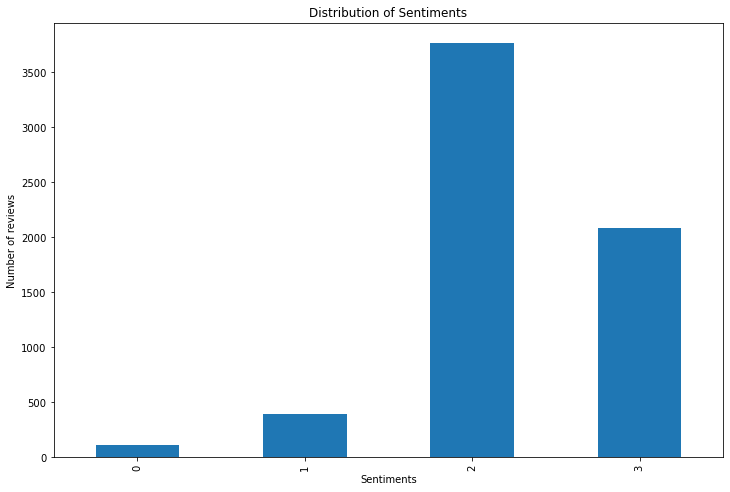

In [19]:
plt.figure(figsize=(12,8))
df['Sentiment'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of reviews')

In [20]:
df['Product_Description']= hero.clean(df['Product_Description'])

In [21]:
df['Product_Description']

0       web designeruas guide ios android apps today m...
1       rt mention line ipad longer today yesterday sx...
2       crazy apple opening temporary store austin tom...
3       lesson google one pass digital environment use...
4       rt mention panel quot mom ipad designing boome...
                              ...                        
6359    thanks mention hosting event sxsw sxswi iwanta...
6360    sxsw iphone app awesome ipad app crashes every...
6361    rt mention rt mention download free tracks men...
6362    oh texas social media awards need ask mother a...
6363    google launching quot major quot new social ne...
Name: Product_Description, Length: 6364, dtype: object

### Removing unnecessary words 

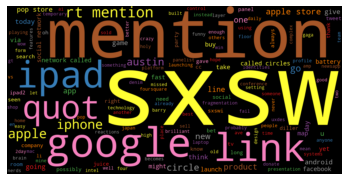

In [24]:
##wordcloud for sentiment 0

wc = WordCloud(width=1600,height = 800,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==0].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

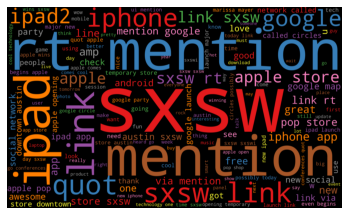

In [25]:
##wordcloud for sentiment 3

wc = WordCloud(width=5000,height = 3000,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==3].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

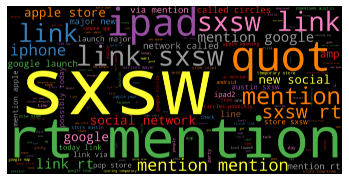

In [26]:
##wordcloud for sentiment 2

wc = WordCloud(width=6000,height = 3000,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==2].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

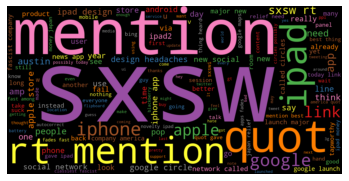

In [27]:
##wordcloud for sentiment 1

wc = WordCloud(width=1600,height = 800,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==1].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
stop_words = stopwords.words('english')
stop_words = ['sxwi','rt','mention','mention','u','quot','google','apple','ipad','iphone','link','rt','sxsw','austin','popup','store','circle','one','give','new','product','going','go','line','circles','app','today','new','launch','sxswi','ipad2','time','via','people','amp','network','social','android']
def remove_stop_words(text):
    new_words = [word for word in text.split() if word not in stop_words]
    return ' '.join(new_words)

In [45]:
df['Product_Description'] = df['Product_Description'].apply(remove_stop_words)

### now checking word cloud again 

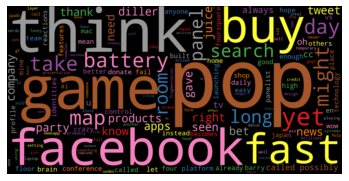

In [46]:
##wordcloud for sentiment 0

wc = WordCloud(width=1600,height = 800,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==0].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

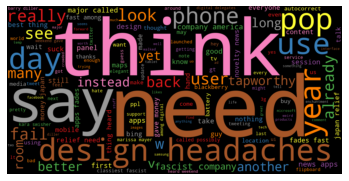

In [47]:
##wordcloud for sentiment 1

wc = WordCloud(width=1600,height = 800,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==1].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

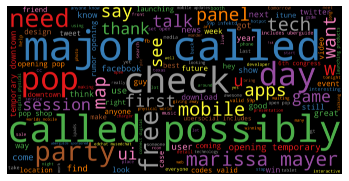

In [48]:
##wordcloud for sentiment 2

wc = WordCloud(width=6000,height = 3000,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==2].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

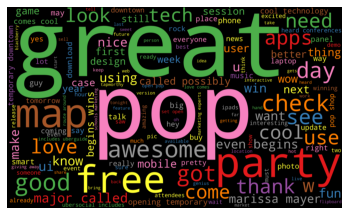

In [49]:
##wordcloud for sentiment 3

wc = WordCloud(width=5000,height = 3000,background_color="black",max_words=150,colormap="Set1").generate(" ".join(df[df["Sentiment"]==3].Product_Description))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

###  ADDING SENTIMENT SCORES

In [52]:
sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    Product_Description=row['Product_Description']
    myid = row['Text_ID']
    res[myid]=sia.polarity_scores(Product_Description)

  0%|          | 0/6364 [00:00<?, ?it/s]

In [53]:
res

{3057: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6254: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106},
 8212: {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.34},
 4422: {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.0772},
 5526: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6064: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772},
 7713: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2975: {'neg': 0.323, 'neu': 0.385, 'pos': 0.292, 'compound': 0.1531},
 818: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1318: {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.7351},
 5454: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1618: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3902: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6513: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 728: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7667: {'neg': 0.42, 'neu': 0

In [54]:
pd.DataFrame(res).T

,neg,neu,pos,compound
3057,0.000,1.000,0.000,0.0000
6254,0.000,0.476,0.524,0.5106
8212,0.231,0.769,0.000,-0.3400
4422,0.000,0.894,0.106,0.0772
5526,0.000,1.000,0.000,0.0000
...,...,...,...,...
2945,0.000,0.508,0.492,0.4404
4528,0.000,0.328,0.672,0.6249
6526,0.000,0.645,0.355,0.5106
2110,0.000,0.700,0.300,0.4588


In [55]:
Sentiment_scores = pd.DataFrame(res).T
Sentiment_scores

,neg,neu,pos,compound
3057,0.000,1.000,0.000,0.0000
6254,0.000,0.476,0.524,0.5106
8212,0.231,0.769,0.000,-0.3400
4422,0.000,0.894,0.106,0.0772
5526,0.000,1.000,0.000,0.0000
...,...,...,...,...
2945,0.000,0.508,0.492,0.4404
4528,0.000,0.328,0.672,0.6249
6526,0.000,0.645,0.355,0.5106
2110,0.000,0.700,0.300,0.4588


In [56]:
Sentiment_scores = Sentiment_scores.reset_index().rename(columns={'index':'id'})


In [57]:
Sentiment_scores.drop('id',axis =1)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.476,0.524,0.5106
2,0.231,0.769,0.000,-0.3400
3,0.000,0.894,0.106,0.0772
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
6359,0.000,0.508,0.492,0.4404
6360,0.000,0.328,0.672,0.6249
6361,0.000,0.645,0.355,0.5106
6362,0.000,0.700,0.300,0.4588


In [59]:
df = pd.merge(Sentiment_scores,df,right_index=True,left_index=True)

In [60]:
df.drop('id',axis =1)

,neg,neu,pos,compound,Text_ID,Product_Description,Product_Type,Sentiment
0,0.000,1.000,0.000,0.0000,3057,web designeruas guide ios apps,9,2
1,0.000,0.476,0.524,0.5106,6254,longer yesterday getting fun,9,2
2,0.231,0.769,0.000,-0.3400,8212,crazy opening temporary tomorrow handle rabid ...,9,2
3,0.000,0.894,0.106,0.0772,4422,lesson pass digital environment users want pur...,9,2
4,0.000,1.000,0.000,0.0000,5526,panel mom designing boomers,9,2
...,...,...,...,...,...,...,...,...
6359,0.000,0.508,0.492,0.4404,2945,thanks hosting event iwantacr48,9,2
6360,0.000,0.328,0.672,0.6249,4528,awesome crashes every,7,1
6361,0.000,0.645,0.355,0.5106,6526,download free tracks music sampler including g...,9,2
6362,0.000,0.700,0.300,0.4588,2110,oh texas media awards need ask mother anymore,9,2


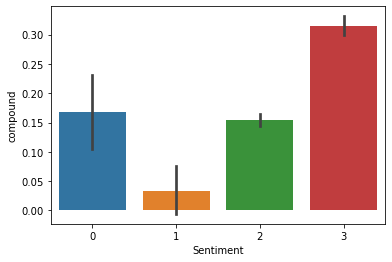

In [61]:
sns.barplot(data=df,x='Sentiment',y = 'compound')

plt.show()

In [70]:
NUM_TOP_WORDS = 50
hero.top_words(df['Product_Description'])[:NUM_TOP_WORDS]

pop          409
get          268
party        266
free         266
called       257
mobile       235
major        211
like         210
check        189
temporary    183
w            179
day          174
possibly     174
opening      171
maps         163
apps         160
downtown     156
need         154
see          149
mayer        148
open         148
great        148
know         130
come         129
win          128
marissa      124
news         120
ui           117
cool         116
tech         115
us           113
good         111
got          109
first        109
panel        107
think        107
shop         104
want         104
best         103
design       101
music        100
next          99
around        98
location      98
use           97
game          97
search        96
thanks        96
love          95
awesome       94
Name: Product_Description, dtype: int64

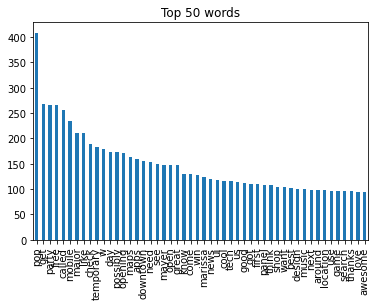

In [75]:
NUM_TOP_WORDS = 50

top_50 = hero.visualization.top_words(df['Product_Description']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_50.plot.bar(rot=90, title="Top 50 words");

plt.show(block=True);

In [79]:
df['tfidf_product_description'] = hero.tfidf(df['Product_Description'])

In [84]:
df['tfidf_product_description']

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
6359    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6360    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6361    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6362    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6363    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf_product_description, Length: 6364, dtype: object

In [86]:
df['pca_tfidf_clean_text'] = hero.pca(df['tfidf_product_description'])

In [88]:
df['pca_tfidf_clean_text']

0        [-0.025040811658888343, -0.03104637125294142]
1         [-0.0237840066363551, -0.028432718640400017]
2           [-0.03267426738734906, 0.2038798631615168]
3       [-0.023766491640487813, -0.031340158879800704]
4          [-0.0255986045576757, -0.03448481137486411]
                             ...                      
6359    [-0.022870201361967313, -0.026613121007499026]
6360      [-0.02437742653862843, -0.02860996631380697]
6361      [-0.02911360384930499, -0.04528977030451377]
6362      [-0.0208673693539305, -0.023786419066677788]
6363      [0.26696103655928316, -0.010509168551351708]
Name: pca_tfidf_clean_text, Length: 6364, dtype: object

### getting common words from each Product Type

In [96]:
NUM_TOP_WORDS = 5
df.groupby('Product_Type')['Product_Description'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Product_Type            
0             team            9
              party           8
              free            5
              pearl           5
              lustre          5
1             thanks         12
              gowalla        11
              yes            10
              awards         10
              choice         10
2             pop           107
              opening        49
              downtown       46
              cool           44
              temporary      44
3             party          59
              mayer          26
              great          25
              bing           23
              marissa        23
4             free            7
              case            6
              itunes          5
              charger         4
              sampler         4
5             maps           61
              major          31
              called         31
              mobile         25
              possibly       21
6             p

### Common words from each sentiment

In [97]:
NUM_TOP_WORDS = 10
df.groupby('Sentiment')['Product_Description'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Sentiment           
0          like           8
           pop            7
           called         5
           battery        4
           take           4
           buy            4
           fast           4
           yet            4
           game           4
           facebook       4
1          like          31
           apps          24
           design        23
           need          22
           get           18
           think         15
           headaches     15
           would         14
           pop           14
           news          13
2          pop          241
           called       193
           free         179
           mobile       162
           major        157
           party        157
           get          140
           possibly     133
           check        122
           temporary    121
3          pop          147
           get          107
           party        102
           cool          93
           great         90